In [8]:
import pandas as pd
import os

# Merging 12months of data into 1


In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")


In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir("./Sales_Data/") if not file.startswith('.')]

for file in files:
    current_data = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [18]:
all_data = pd.read_csv("all_data.csv")


In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

In [22]:
all_data['Month'] = all_data['Order Date'].dt.month


In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0


In [24]:
all_data1 = all_data.dropna()

In [25]:
all_data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0


In [26]:
data_types = all_data.dtypes

# Display the data types of each column
print(data_types)

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                      float64
dtype: object


In [28]:
all_data1['Month'] = all_data1['Month'].astype('int32')

# Display the updated DataFrame with the "Month" column as int32
all_data1.head()

C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\4032345038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data1['Month'] = all_data1['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [29]:
data_types = all_data1.dtypes

# Display the data types of each column
print(data_types)

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
dtype: object


In [30]:
all_data1['Quantity Ordered'] = pd.to_numeric(all_data1['Quantity Ordered'])
all_data1['Price Each'] = pd.to_numeric(all_data1['Price Each'])

# Create a new column for sales
all_data1['Sales'] = all_data1['Quantity Ordered'] * all_data1['Price Each']


C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\1252960109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data1['Quantity Ordered'] = pd.to_numeric(all_data1['Quantity Ordered'])
C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\1252960109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data1['Price Each'] = pd.to_numeric(all_data1['Price Each'])
C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\1252960109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [33]:
all_data1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#  Question 1: What was the best month for sales? How much was earned that month? 

In [32]:
all_data1.to_csv('all_data1.csv', index=False)

In [34]:
# Group by the "Month" column and sum the "Sales" column
monthly_sales = all_data1.groupby('Month')['Sales'].sum()

# Find the month with the highest sales
best_month = monthly_sales.idxmax()  # idxmax() returns the index of the maximum value

# Find the total sales in the best month
best_month_sales = monthly_sales.max()

# Display the results
print(f"The best month for sales was Month {best_month} with total sales of ${best_month_sales:.2f}")

The best month for sales was Month 12 with total sales of $4613443.34


In [35]:
import matplotlib.pyplot as plt

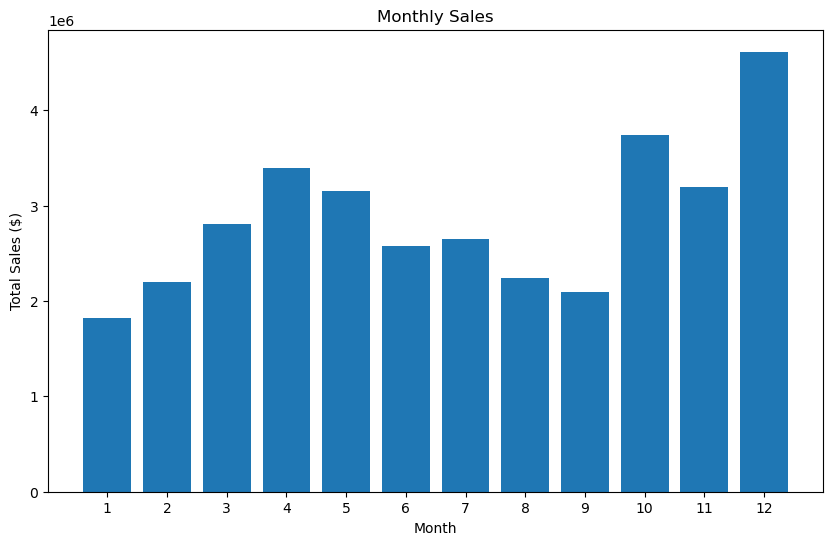

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(monthly_sales.index)
plt.show()

 # Question 2: What city sold the most product?

In [37]:
all_data1['City'] = all_data1['Purchase Address'].apply(lambda x: x.split(', ')[1])  # Extract city from the address
city_sales = all_data1.groupby('City')['Sales'].sum()

C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\3796465960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data1['City'] = all_data1['Purchase Address'].apply(lambda x: x.split(', ')[1])  # Extract city from the address


In [38]:
all_data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [39]:
best_city = city_sales.idxmax()  # idxmax() returns the index of the maximum value

# Find the total sales in the best city
best_city_sales = city_sales.max()


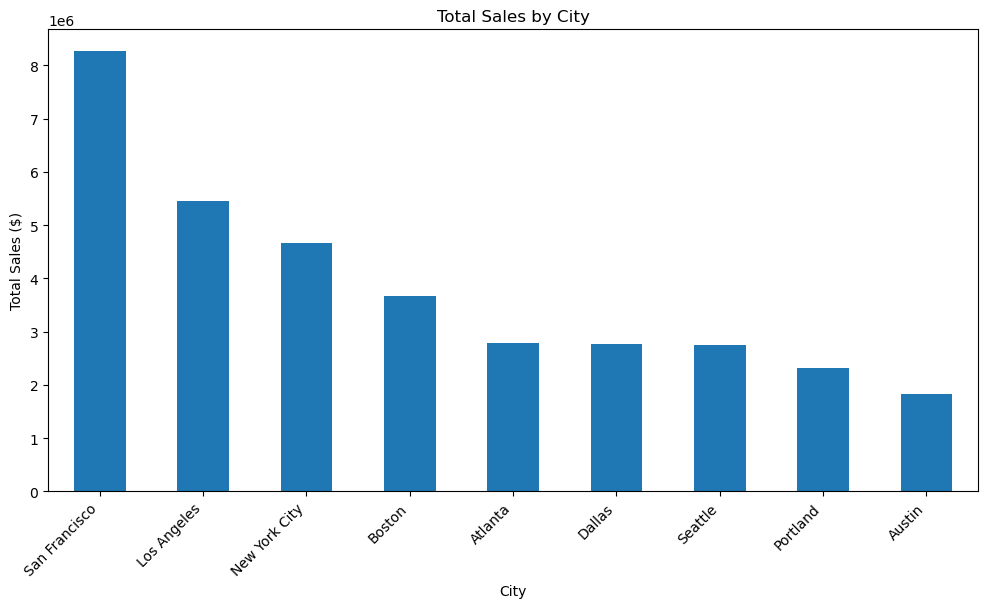

The city with the highest total sales is San Francisco with total sales of $8262203.91


In [41]:
# Plot the city-wise sales
plt.figure(figsize=(12, 6))
city_sales.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the results
print(f"The city with the highest total sales is {best_city} with total sales of ${best_city_sales:.2f}")

# Q3  What time should we display advertisements to maximize likelihood of customer's buying product?

In [42]:
# Extract the hour from the "Order Date" and create a new column
all_data1['Hour'] = all_data1['Order Date'].dt.hour

# Group by the hour and calculate the total sales for each hour
hourly_sales = all_data1.groupby('Hour')['Sales'].sum()


C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\1175064726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data1['Hour'] = all_data1['Order Date'].dt.hour


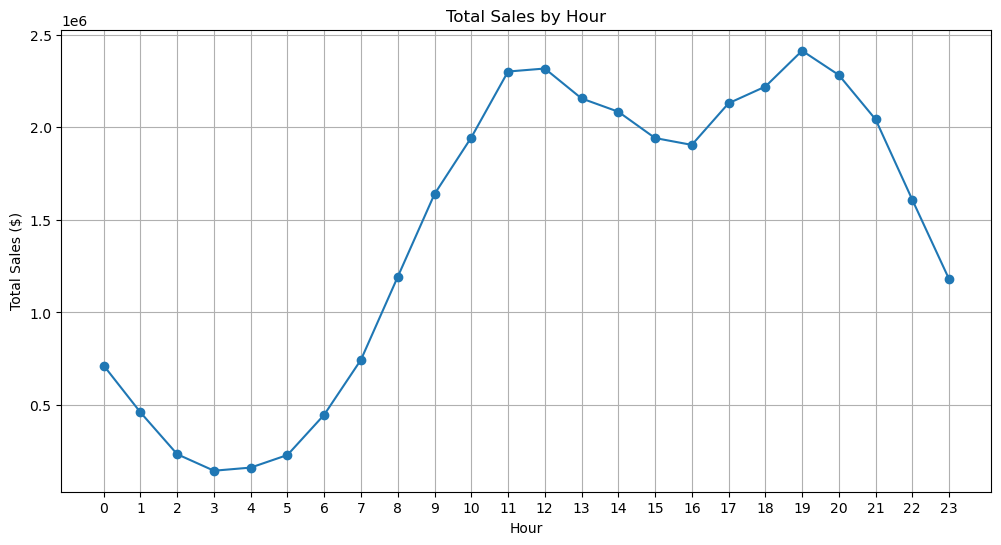

The best time to display advertisements and maximize sales is at 19:00


In [43]:

# Find the hour with the highest sales
best_hour = hourly_sales.idxmax()

# Plot the hourly sales
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o')
plt.title('Total Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Display the results
print(f"The best time to display advertisements and maximize sales is at {best_hour}:00")

# Q4 What products are most often sold together?

In [44]:
duplicated_orders = all_data1[all_data1.duplicated(subset=['Order ID'], keep=False)]

In [46]:
duplicated_orders.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11


In [47]:
duplicated_orders['Grouped'] = duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\Parth\AppData\Local\Temp\ipykernel_31064\3844864141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_orders['Grouped'] = duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [48]:
# Drop duplicates to get unique combinations
unique_grouped = duplicated_orders[['Order ID', 'Grouped']].drop_duplicates()

# Count the occurrences of each unique combination
combination_counts = unique_grouped['Grouped'].value_counts()

In [49]:

# Display the top combinations
print("Most often sold together items:")
print(combination_counts.head(10))

Most often sold together items:
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Grouped, dtype: int64
